# Happiness Analysis

## Required Imports

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 600 # High resolution images throughout notebook
%matplotlib inline

## Preprocessing (Downloading and Cleaning Data)

In [26]:
# read csv files into data frames
df = pd.read_csv("data/world-happiness-report.csv")
df2021 = pd.read_csv("data/world-happiness-report-2021.csv")

In [27]:
# examine names of columns for 2008-2020 data frame
list(df.columns)

['Country name',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [28]:
# examine names of columns for 2021 data frame
list(df2021.columns)

['Country name',
 'Regional indicator',
 'Ladder score',
 'Standard error of ladder score',
 'upperwhisker',
 'lowerwhisker',
 'Logged GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Ladder score in Dystopia',
 'Explained by: Log GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption',
 'Dystopia + residual']

In [29]:
# add column for year on 2021 data frame
df2021['Year'] = 2021

In [30]:
# drop columns whose data will not be analyzed
df2021 = df2021.drop(columns=['Standard error of ladder score','upperwhisker', 'lowerwhisker',
       'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'], axis=1)
df = df.drop(columns=['Positive affect','Negative affect'], axis=1)

In [31]:
# rename columns
df2021 = df2021.rename(columns = {'Logged GDP per capita':'Log GDP per capita'} )
df = df.rename(columns= {'year':'Year', 'Life Ladder':'Ladder score', 'Healthy life expectancy at birth' : 'Healthy life expectancy'})

In [32]:
# add column for regional indicator on 2005-2020 data frame
df_with_regions = pd.merge(df, df2021[['Country name','Regional indicator']], on = ['Country name'])

In [33]:
# combine data sets to create one data frame for 2005-2021
df_all = pd.concat([df_with_regions, df2021], ignore_index=True).sort_values(by="Country name", ascending=True)
years_list = list(df_all["Year"].unique())
sorted(years_list)

[2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

In [34]:
# add column for time in terms of COVID
def covid_time(row):
    if row["Year"] < 2020: #distinguishing between pre-covid and post-covid could be improved if we had data by month and if we had data in future
        return "Pre-COVID"  #assuming that the pre-covid is before 2020
    else:
        return "Post-COVID" #assuming that the post-covid is 2020 & 2021

df_all["COVID time"] = df_all.apply(covid_time, axis=1)

In [35]:
# reorder columns
df_all = df_all[['Country name',
                 'Regional indicator',
                 'Year',
                 'COVID time',
                 'Ladder score',
                 'Log GDP per capita',
                 'Healthy life expectancy',
                 'Social support',
                 'Freedom to make life choices',
                 'Generosity',
                 'Perceptions of corruption']]

In [36]:
# confirm that data frame has the necessary columns in the intended order
list(df_all.columns)

['Country name',
 'Regional indicator',
 'Year',
 'COVID time',
 'Ladder score',
 'Log GDP per capita',
 'Healthy life expectancy',
 'Social support',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [37]:
# observe the head and tail of the processed data frame
df_all

,Country name,Regional indicator,Year,COVID time,Ladder score,Log GDP per capita,Healthy life expectancy,Social support,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,South Asia,2008,Pre-COVID,3.724,7.370,50.800,0.451,0.718,0.168,0.882
11,Afghanistan,South Asia,2019,Pre-COVID,2.375,7.697,52.400,0.420,0.394,-0.108,0.924
10,Afghanistan,South Asia,2018,Pre-COVID,2.694,7.692,52.600,0.508,0.374,-0.094,0.928
9,Afghanistan,South Asia,2017,Pre-COVID,2.662,7.697,52.800,0.491,0.427,-0.121,0.954
8,Afghanistan,South Asia,2016,Pre-COVID,4.220,7.697,53.000,0.559,0.523,0.042,0.793
...,...,...,...,...,...,...,...,...,...,...,...
1873,Zimbabwe,Sub-Saharan Africa,2008,Pre-COVID,3.174,7.461,44.140,0.843,0.344,-0.090,0.964
1871,Zimbabwe,Sub-Saharan Africa,2006,Pre-COVID,3.826,7.711,41.580,0.822,0.431,-0.076,0.905
2033,Zimbabwe,Sub-Saharan Africa,2021,Post-COVID,3.145,7.943,56.201,0.750,0.677,-0.047,0.821
1877,Zimbabwe,Sub-Saharan Africa,2012,Pre-COVID,4.955,7.983,49.540,0.896,0.470,-0.103,0.859


In [38]:
# check for missing values
df_all.isna().sum()

Country name                      0
Regional indicator                0
Year                              0
COVID time                        0
Ladder score                      0
Log GDP per capita               24
Healthy life expectancy          51
Social support                    9
Freedom to make life choices     30
Generosity                       76
Perceptions of corruption       104
dtype: int64

In [39]:
df_all = df_all.dropna()

In [40]:
df_all.shape

(1816, 11)

# Sort Countries by Average Ladder Score (2005-2021)

In [41]:
df_all_ladder = df_all.groupby(['Country name', 'Regional indicator'])['Ladder score'].mean().sort_values(ascending=False)
print("top 15:\n", df_all_ladder.head(15))
print("\nbottom 15:\n", df_all_ladder.tail(15))

top 15:
 Country name  Regional indicator          
Denmark       Western Europe                  7.653800
Finland       Western Europe                  7.614643
Switzerland   Western Europe                  7.550364
Norway        Western Europe                  7.501455
Netherlands   Western Europe                  7.466286
Iceland       Western Europe                  7.449125
Sweden        Western Europe                  7.368600
Canada        North America and ANZ           7.351067
New Zealand   North America and ANZ           7.308067
Australia     North America and ANZ           7.270786
Austria       Western Europe                  7.244071
Israel        Middle East and North Africa    7.217333
Costa Rica    Latin America and Caribbean     7.172000
Luxembourg    Western Europe                  7.070250
Ireland       Western Europe                  7.068867
Name: Ladder score, dtype: float64

bottom 15:
 Country name  Regional indicator          
Sierra Leone  Sub-Saharan Africa

# Average Ladder Score by Region (2021)

Text(0.5, 1.0, 'Average Ladder Score by Region (2021)')

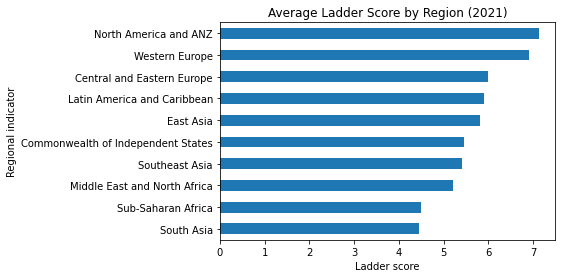

In [42]:
df2021.groupby('Regional indicator')['Ladder score'].mean().sort_values(ascending=True).plot.barh()

plt.xlabel("Ladder score")
plt.title("Average Ladder Score by Region (2021)")

# Ladder Score by Region 2005 - 2021

Text(0.5, 1.0, 'Average Ladder Score by Region (2005-2021)')

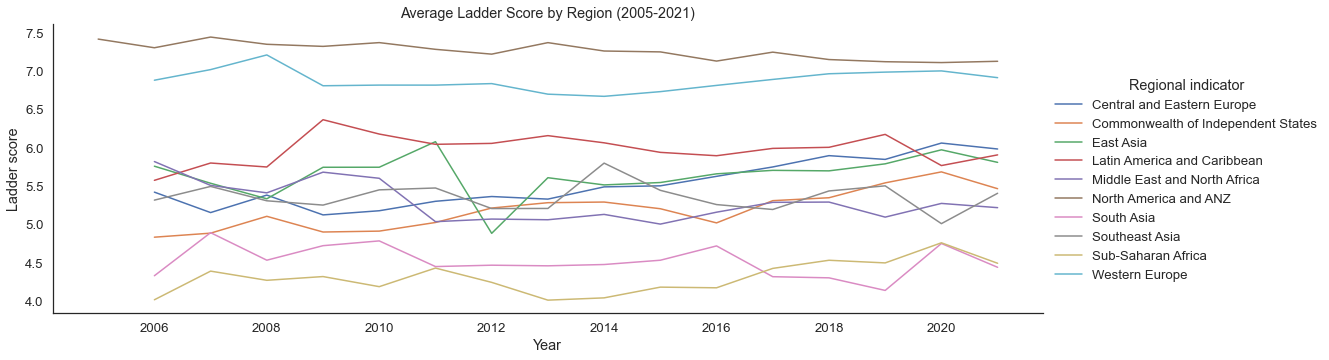

In [43]:
df_region = df_all.groupby(['Regional indicator', 'Year'])['Ladder score'].mean().to_frame().reset_index()
df_pivot_region = df_region.pivot("Year", "Regional indicator", "Ladder score")

sns.set(style="white", font_scale=1.2)
sns.relplot(data=df_pivot_region, kind="line", height=5, aspect=3, dashes=False)

plt.ylabel("Ladder score") 
plt.title("Average Ladder Score by Region (2005-2021)")

# Pre-COVID vs. Post-COVID

Text(0.5, 1.0, 'Average Ladder Score by Region (Pre-COVID vs. Post-COVID)')

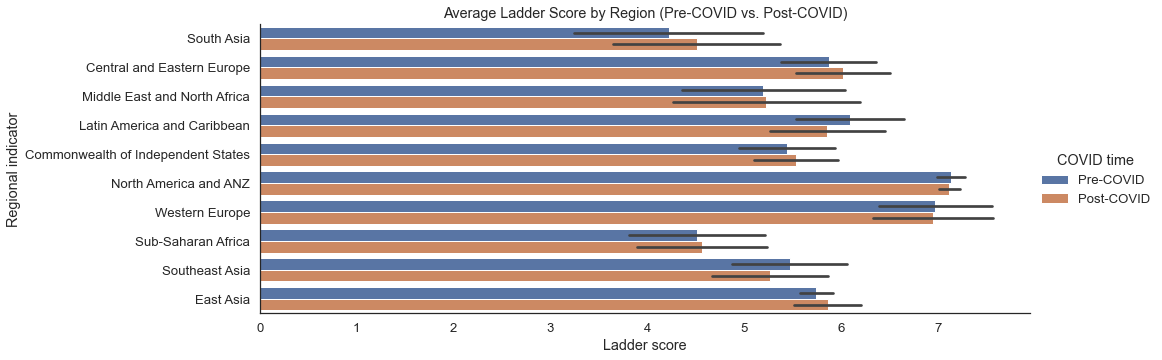

In [44]:
sns.set(style="white", font_scale=1.2)
covid_plot = sns.catplot(x="Ladder score", y="Regional indicator", hue="COVID time", data=df_all[df_all['Year'] >= 2018], kind="bar", height=5, aspect=3, ci="sd")

plt.title("Average Ladder Score by Region (Pre-COVID vs. Post-COVID)")

# Correlation Between Features and Ladder Score

Text(0.5, 1.0, 'Correlation to Ladder Score')

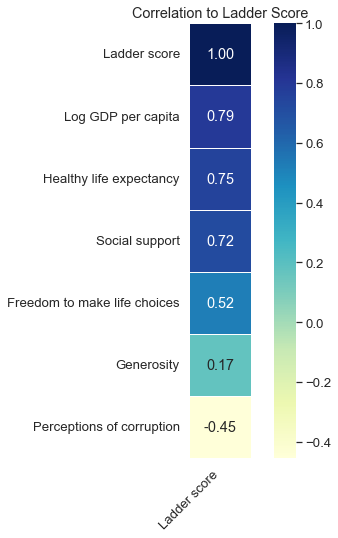

In [45]:
corr_matrix = df_all.drop("Year", axis =1).corr()

f,ax=plt.subplots(figsize=(8,8))
corr_ladder = sns.heatmap(corr_matrix.loc[:, ["Ladder score"]], annot=True, linewidth=.5,fmt='.2f',ax=ax, square=True, cmap='YlGnBu')
corr_ladder.set_xticklabels(corr_ladder.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Correlation to Ladder Score")

Text(0.5, 1.0, 'Heat Map')

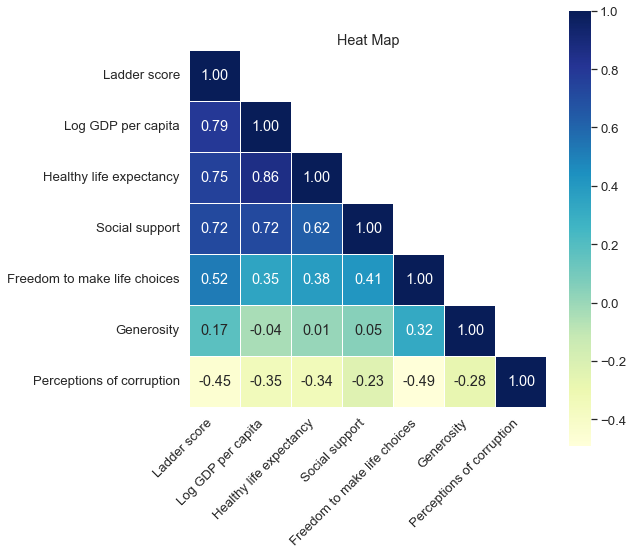

In [46]:
corr_matrix_tri = corr_matrix.where(np.tril(np.ones(corr_matrix.shape)).astype(bool))

f,ax=plt.subplots(figsize=(8,8))
hmap = sns.heatmap(corr_matrix_tri, annot=True, linewidth=.5,fmt='.2f',ax=ax, square=True, cmap='YlGnBu')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Heat Map")

# Multiple Linear Regression


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

start = df_all.groupby('Country name').mean()
to_plot = start.copy().reset_index().drop("Year", axis=1)

feature_list = ["Log GDP per capita", "Healthy life expectancy", "Social support",
                "Freedom to make life choices", "Generosity", "Perceptions of corruption"]

y = to_plot["Ladder score"]

X = to_plot[["Log GDP per capita", "Healthy life expectancy", "Social support",
                "Freedom to make life choices", "Generosity", "Perceptions of corruption"]]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
model.coef_

array([ 0.43433184,  0.17969019,  0.27112623,  0.13597944,  0.10812163,
       -0.08916751])

## Results on Training Data

In [50]:
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
print(("mean squared error: {}\nmean absolute error: {}\nr^2: {}")
      .format(mse, mae, r2))

mean squared error: 0.19245828845773572
mean absolute error: 0.33462951019443715
r^2: 0.8209008540013878


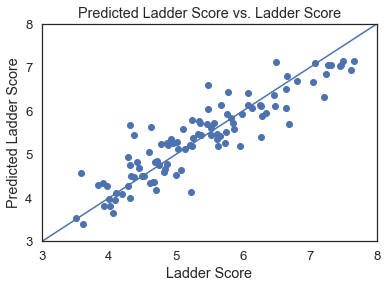

In [51]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Ladder Score")
plt.ylabel("Predicted Ladder Score")
plt.title("Predicted Ladder Score vs. Ladder Score")
x_exp = np.linspace(0,10,2)
y_exp = x_exp
plt.plot(x_exp, y_exp, '-b')
plt.xlim([3, 8])
plt.ylim([3, 8])
plt.show()

## Results on Test Data

In [52]:
y_test_pred = model.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print(("mean squared error: {}\nmean absolute error: {}\nr^2: {}")
      .format(mse, mae, r2))

mean squared error: 0.24027042235684734
mean absolute error: 0.3617449799349029
r^2: 0.7911677767826724


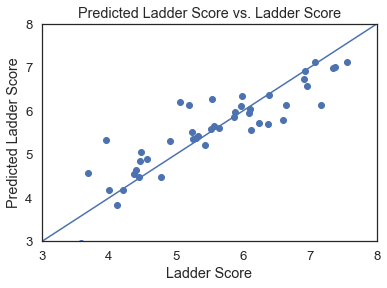

In [53]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Ladder Score")
plt.ylabel("Predicted Ladder Score")
plt.title("Predicted Ladder Score vs. Ladder Score")
x_exp = np.linspace(0,10,2)
y_exp = x_exp
plt.plot(x_exp, y_exp, '-b')
plt.xlim([3, 8])
plt.ylim([3, 8])
plt.show()

## Feature Importances

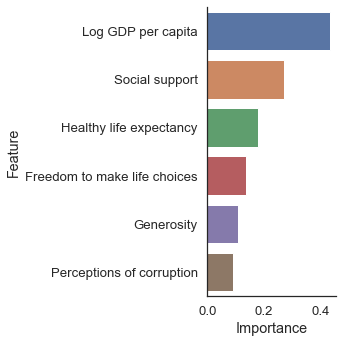

In [54]:
importances = pd.DataFrame([X.columns, map(abs, model.coef_)]).T
importances.rename(columns={0: 'Feature', 1: 'Importance'}, inplace=True)
importances_graph = sns.catplot(data=importances.sort_values(by="Importance", ascending=False), x="Importance", y="Feature", kind="bar")

# Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=22, criterion='mse', max_depth=10,
 min_samples_split=4, max_leaf_nodes=30, min_samples_leaf=1, max_samples=0.5,
 max_features='auto')

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_leaf_nodes=30, max_samples=0.5,
                      min_samples_split=4, n_estimators=22)

## Results on Training Data

In [56]:
y_train_pred = model.predict(X_train)

mse = mean_squared_error(y_true=y_train, y_pred=y_train_pred)
mae = mean_absolute_error(y_true=y_train, y_pred=y_train_pred)
r2 = r2_score(y_true=y_train, y_pred=y_train_pred)
print(("mean squared error: {}\nmean absolute error: {}\nr^2: {}")
      .format(mse, mae, r2))

mean squared error: 0.08908422997138671
mean absolute error: 0.22780833902814332
r^2: 0.9170993900149794


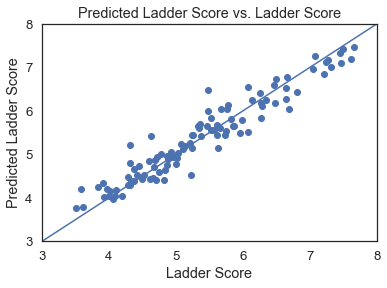

In [57]:
plt.scatter(y_train, y_train_pred)
plt.xlabel("Ladder Score")
plt.ylabel("Predicted Ladder Score")
plt.title("Predicted Ladder Score vs. Ladder Score")
x_exp = np.linspace(0,10,2)
y_exp = x_exp
plt.plot(x_exp, y_exp, '-b')
plt.xlim([3, 8])
plt.ylim([3, 8])
plt.show()

## Results on Test Data

In [58]:
y_test_pred = model.predict(X_test)

mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_test_pred)
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
print(("mean squared error: {}\nmean absolute error: {}\nr^2: {}")
      .format(mse, mae, r2))

mean squared error: 0.2213839178575927
mean absolute error: 0.3500851539640447
r^2: 0.8075830753645579


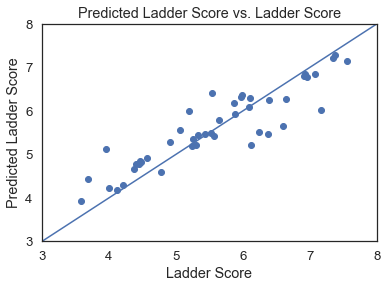

In [59]:
plt.scatter(y_test, y_test_pred)
plt.xlabel("Ladder Score")
plt.ylabel("Predicted Ladder Score")
plt.title("Predicted Ladder Score vs. Ladder Score")
x_exp = np.linspace(0,10,2)
y_exp = x_exp
plt.plot(x_exp, y_exp, '-b')
plt.xlim([3, 8])
plt.ylim([3, 8])
plt.show()

## Feature Importances

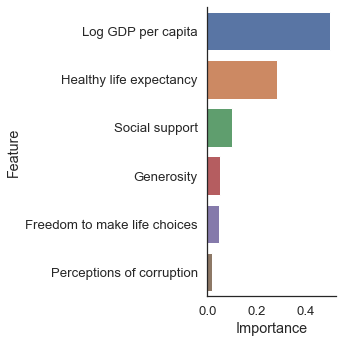

In [60]:
importances = pd.DataFrame([X.columns, model.feature_importances_]).T
importances.rename(columns={0: 'Feature', 1: 'Importance'}, inplace=True)
importances_graph = sns.catplot(data=importances.sort_values(by="Importance", ascending=False), x="Importance", y="Feature", kind="bar")

# Clustering

In [107]:
list(df_all.select_dtypes(include='number').columns)

['Year',
 'Ladder score',
 'Log GDP per capita',
 'Healthy life expectancy',
 'Social support',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

In [108]:
from sklearn.cluster import KMeans

start = df_all.groupby('Country name').mean()

X = start.select_dtypes(include='number')
X = X[['Ladder score', 'Log GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption']].copy()
 
model = KMeans(n_clusters=3)
model.fit(X)
y = model.predict(X)
y = y + 1

# remove the year column because its integer value is irrelevent to correlation with ladder score
to_plot = start.copy().reset_index().drop("Year", axis=1)
to_plot.loc[:, 'cluster'] = pd.Series(y)

## Review Countries in Each Cluster

In [109]:
cluster_sorted = to_plot.sort_values('Country name')

# highest cluster
highest = cluster_sorted.query("`Country name` == 'United States'")['cluster'].iloc[0]

# middle cluster
middle = cluster_sorted.query("`Country name` == 'Russia'")['cluster'].iloc[0]

# lowest cluster
lowest = cluster_sorted.query("`Country name` == 'South Africa'")['cluster'].iloc[0]

print("highest: ", list(cluster_sorted.query('cluster == @highest')['Country name'].unique()))
print("\nmiddle: ", list(cluster_sorted.query('cluster == @middle')['Country name'].unique()))
print("\nlowest: ", list(cluster_sorted.query('cluster == @lowest')['Country name'].unique()))

highest:  ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'China', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hong Kong S.A.R. of China', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Luxembourg', 'Maldives', 'Malta', 'Netherlands', 'New Zealand', 'North Cyprus', 'Norway', 'Panama', 'Poland', 'Portugal', 'Singapore', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan Province of China', 'United Kingdom', 'United States', 'Uruguay']

middle:  ['Albania', 'Algeria', 'Argentina', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cambodia', 'Colombia', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Georgia', 'Guatemala', 'Honduras', 'Hungary', 'Indonesia', 'Iran', 'Iraq', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Malaysia', 'Mauritius',

## Cluster Breakdown by Regional Indicator

In [110]:
regional = pd.merge(cluster_sorted, df2021[['Country name', 'Regional indicator']], on='Country name')
unstacked = regional.groupby('Regional indicator')['cluster'].value_counts().unstack()
unstacked.rename(columns={highest: 'highest', middle: 'middle', lowest: 'lowest'}, inplace=True)

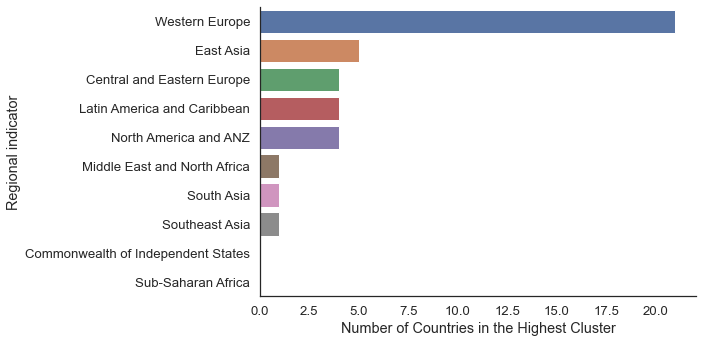

In [111]:
ax_h = sns.catplot(data = unstacked.reset_index().sort_values(by='highest', ascending=False), x='highest', y='Regional indicator', kind='bar', aspect=2)
ax_h.set(xlabel='Number of Countries in the Highest Cluster')

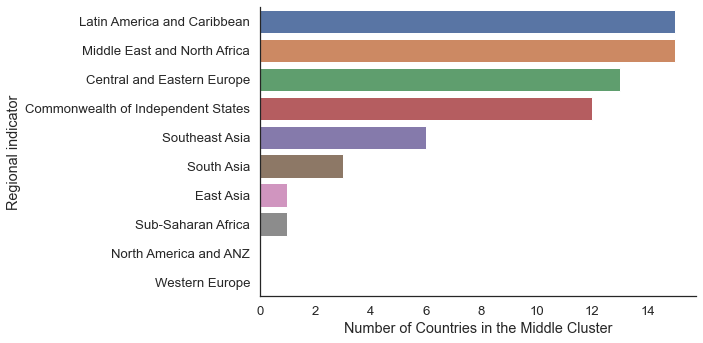

In [112]:
ax_m = sns.catplot(data = unstacked.reset_index().sort_values(by='middle', ascending=False), x='middle', y='Regional indicator', kind='bar', aspect=2)
ax_m.set(xlabel='Number of Countries in the Middle Cluster')

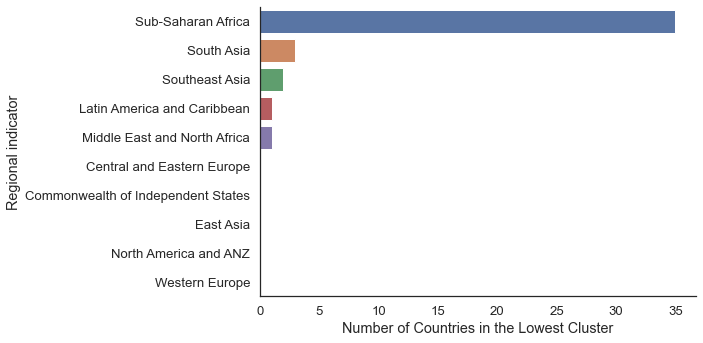

In [113]:
ax_l = sns.catplot(data = unstacked.reset_index().sort_values(by='lowest', ascending=False), x='lowest', y='Regional indicator', kind='bar', aspect=2)
ax_l.set(xlabel='Number of Countries in the Lowest Cluster')

## Pair Plot (Clustered)

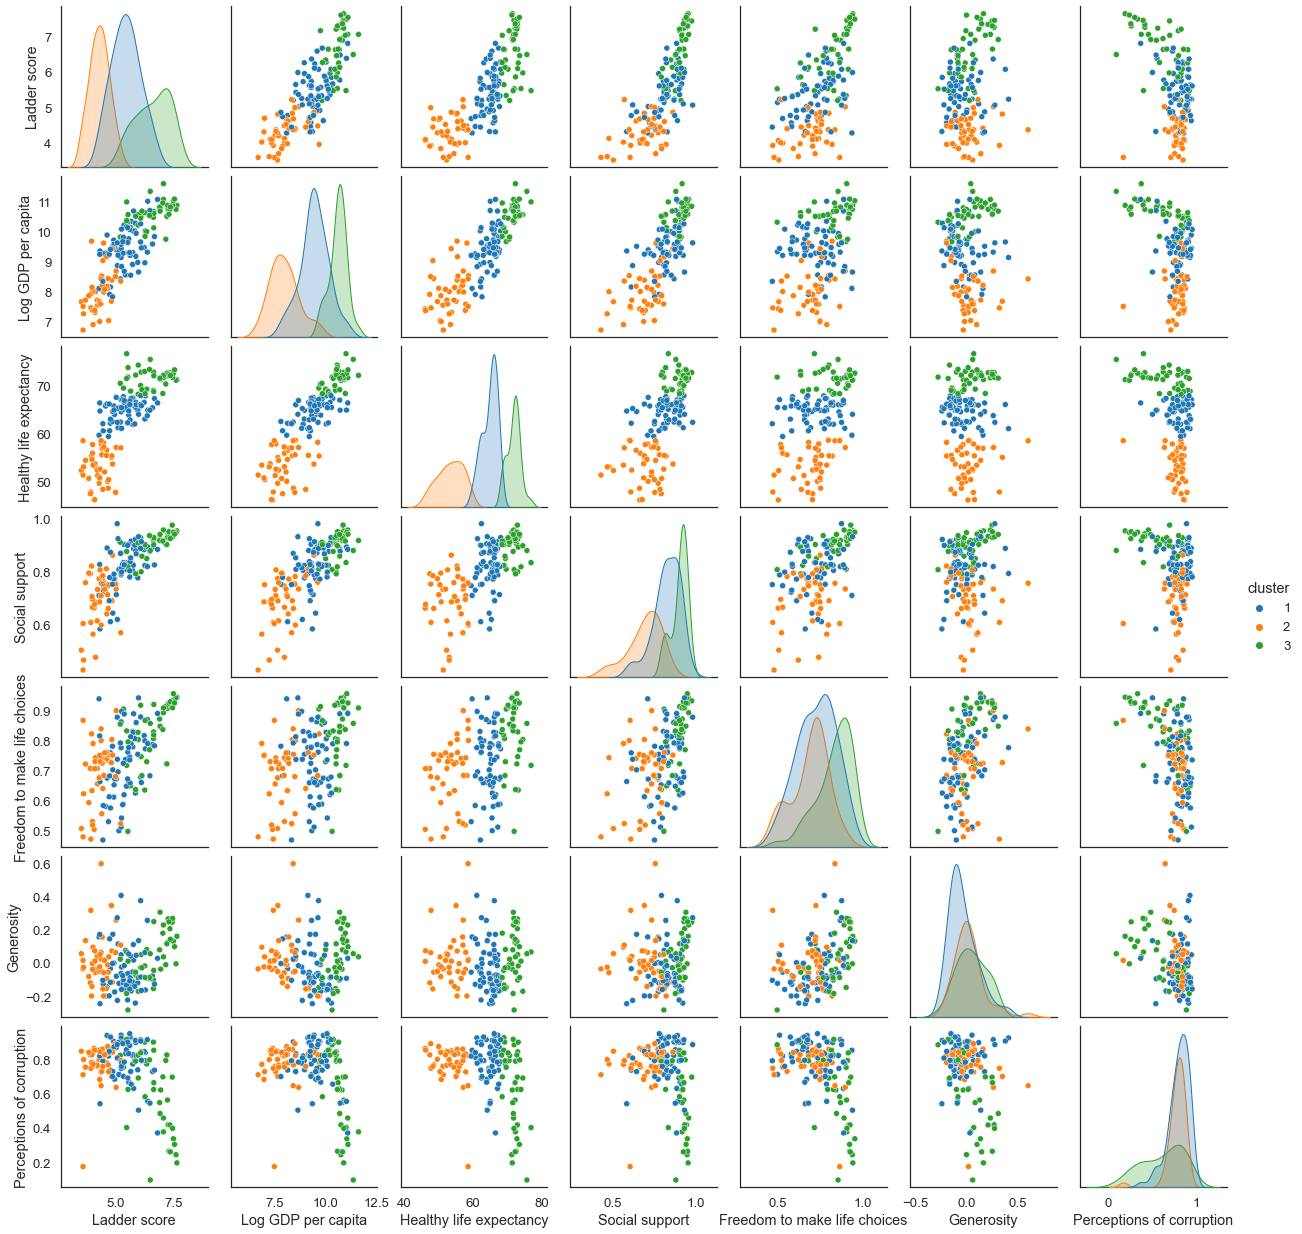

In [114]:
%matplotlib inline
sns.set(style="white", font_scale=1.2)

pair = sns.pairplot(data=to_plot, hue='cluster', palette=sns.color_palette('tab10', n_colors=3))

## Analysis Using Clusters

### Ladder Score Distribution

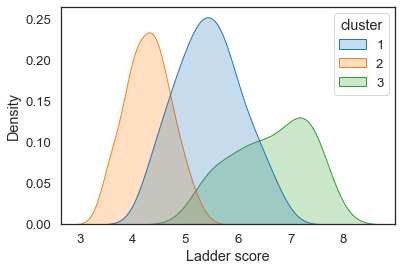

In [115]:
ladder_dist = sns.kdeplot(data=to_plot, shade=True, x='Ladder score', hue='cluster', palette=sns.color_palette('tab10', n_colors=3))

### Perceptions of Corruption Distribution

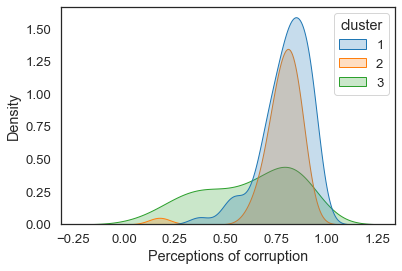

In [116]:
corruption_dist = sns.kdeplot(data=to_plot, shade=True, x='Perceptions of corruption', hue='cluster', palette=sns.color_palette('tab10', n_colors=3))

### Perceptions of corruption vs. Ladder score

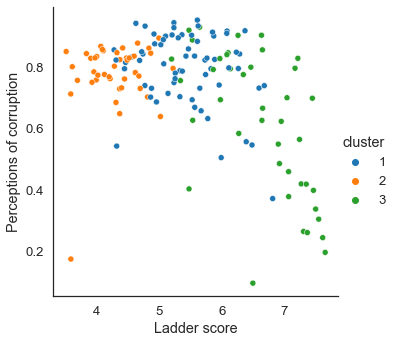

In [117]:
ladder_corruption = sns.relplot(data=to_plot, x='Ladder score', y='Perceptions of corruption', hue='cluster', palette=sns.color_palette('tab10', n_colors=3))

### Perceptions of corruption vs. Log GDP per capita

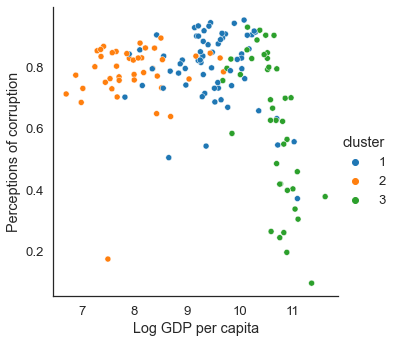

In [118]:
gdp_corruption = sns.relplot(data=to_plot, x='Log GDP per capita', y='Perceptions of corruption', hue='cluster', palette=sns.color_palette('tab10', n_colors=3))